In [1]:
import pandas as pd
import numpy as np

In [2]:
# Setitng values in float insted of scientific notation
pd.options.display.float_format = '{:20,.4f}'.format

companies = pd.read_csv('companies.txt',sep='\t',encoding='iso-8859-1')
round2 = pd.read_csv('rounds2.csv',encoding='iso-8859-1')
#Check pont 1-4
#converting company_permalinks to upper and encoding
round2['company_permalink'] = round2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
round2['company_permalink'] = round2['company_permalink'].str.upper()
#converting companies permalink to upper
#companies.columns
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')
companies['permalink'] = companies['permalink'].str.upper()
#Rename companies column before merge
companies = companies.rename(columns={'permalink':'company_permalink'})
master_frame = pd.merge(companies, round2, on='company_permalink',how='left')

In [3]:
# master frame to only contain ['venture', 'angel', 'seed', 'private_equity']
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
# medians
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity        20,000,000.0000
venture                5,000,000.0000
angel                    400,000.0000
seed                     275,000.0000
Name: raised_amount_usd, dtype: float64

In [3]:
################################## Starting check point 3 ################################################
# getiing data to only include venture type
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
master_frame.describe()

,raised_amount_usd
count,"50,228.0000"
mean,"11,748,949.1295"
std,"86,352,066.5580"
min,0.0000
25%,"1,600,901.7500"
50%,"5,000,000.0000"
75%,"12,000,000.0000"
max,"17,600,000,000.0000"


In [4]:
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA   422,510,842,796.0000
CHN    39,835,418,773.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
CAN     9,583,332,317.0000
FRA     7,259,536,732.0000
ISR     6,907,514,579.0000
DEU     6,346,959,822.0000
JPN     3,363,676,611.0000
SWE     3,254,952,563.0000
NLD     2,939,403,619.0000
CHE     2,827,560,264.0000
SGP     2,793,917,856.0000
ESP     1,835,831,452.0000
BRA     1,785,986,890.0000
Name: raised_amount_usd, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# set a seaborn 
sns.set_style("whitegrid")

In [6]:
# Creating new data frame top9 with the list of countries with highest funding('<data got from wiki')
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]

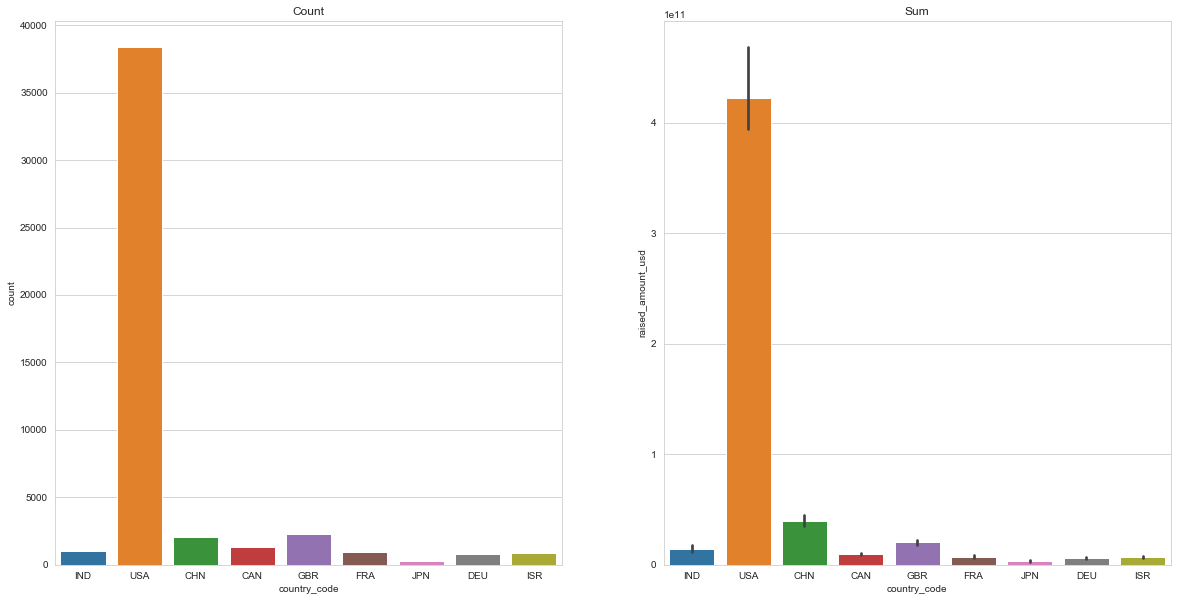

In [7]:
# Plotting sum across top 9 country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top9)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Sum")
plt.show()

In [8]:
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.0000
CHN    39,835,418,773.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
CAN     9,583,332,317.0000
FRA     7,259,536,732.0000
ISR     6,907,514,579.0000
DEU     6,346,959,822.0000
JPN     3,363,676,611.0000
Name: raised_amount_usd, dtype: float64

In [9]:
# Creating a new data frame with only these 3 countires data 
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
Name: raised_amount_usd, dtype: float64

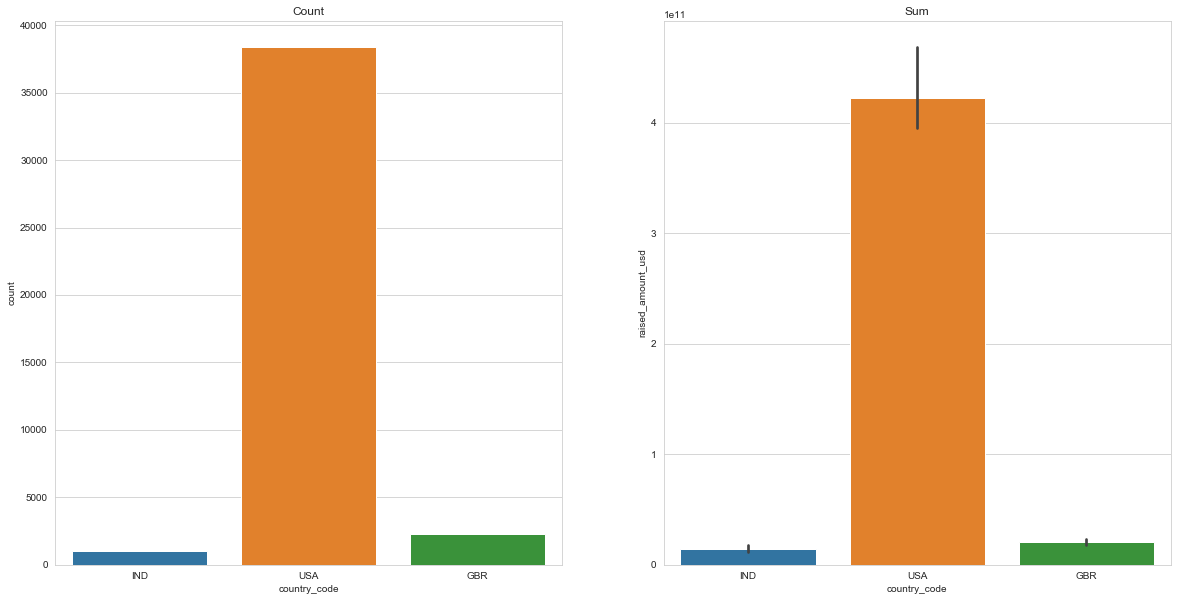

In [10]:
# Plotting sum across top 3 country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top3_english)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top3_english, estimator=sum)
plt.title("Sum")
plt.show()

In [ ]:
###############################################  End ################################################################